In [1]:
import numpy as np 
import pandas as pd 
!pip install kmodes

In [2]:
data=pd.read_csv("/kaggle/input/grocery-product-prices-for-australian-states/Australia_Grocery_2022Sep.csv")
data.drop(["Postal_code","RunDate","Product_Url","tid","state","index"], axis=1,inplace=True)

In [3]:
df=data.dropna()
df=df.reset_index(drop=True)
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE


# K-modes

In [4]:
from kmodes.kprototypes import KPrototypes
categorical_features_idx = [0,1,2,3,5,6,9,11,12,14,15]
data=data.dropna()
data=data.reset_index(drop=True)
mark_array=data.values

In [5]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=10).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 809, ncost: 439894.0638191588
Run: 1, iteration: 2/10, moves: 537, ncost: 431655.8677630146
Run: 1, iteration: 3/10, moves: 307, ncost: 425599.7672671074
Run: 1, iteration: 4/10, moves: 291, ncost: 408823.1338810839
Run: 1, iteration: 5/10, moves: 150, ncost: 379381.4585098247
Run: 1, iteration: 6/10, moves: 132, ncost: 348810.78317469696
Run: 1, iteration: 7/10, moves: 35, ncost: 348236.495392164
Run: 1, iteration: 8/10, moves: 95, ncost: 342896.09943425475
Run: 1, iteration: 9/10, moves: 54, ncost: 340053.3380592234
Run: 1, iteration: 10/10, moves: 33, ncost: 339278.02858843916
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves:

In [6]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['17.546610526315845' '0.24421052631578946' '0.6378947368421053'
  '22.478778947368422' '6.546084210526306' 'Drinks' 'Soft drinks'
  'Soft drink cans' 'Free Range Pork Leg Roast Boneless' '$3.20 per 1L'
  '1kg' 'False' 'Coles' '2741871P' '1L' 'ILPARPA']
 ['8.587742857142867' '0.10285714285714286' '0.7571428571428571'
  '10.136542857142805' '33.954685714285766' 'Meat & seafood' 'Cheese'
  'Nuts & trail mix' 'Natural Sliced Almonds' '$40.00 per 1Kg' '200g'
  'False' 'Coles' '5645739P' '1Kg' 'DEVONPORT']
 ['9.206593406593392' '0.01098901098901099' '0.8571428571428571'
  '10.532637362637358' '84.58021978021996' 'Meat & seafood' 'Seafood'
  'Prepacked seafood' 'Tasmanian Smoked Salmon With A Hint Of Lemon'
  '$96.00 per 1Kg' '100g' 'False' 'Tassal' '3729736P' '1Kg' 'BRUNSWICK']
 ['4.252382711488739' '0.01791651274473587' '0.5700036941263391'
  '5.637210934613977' '3.0316992981160102' 'Pantry'
  'Chips, crackers & snacks' 'Muesli bars & fruit snacks'
  'Chilli Potato Chips' '$1.43 per 100G'

In [7]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
data['cluster'] = list(clusters)
data.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city,cluster
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE,3
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE,0


In [8]:
mark_array

array([['Meat & seafood', 'Poultry', 'Drumsticks & maryland', ..., 3.5,
        '1Kg', 'TEMPE'],
       ['Meat & seafood', 'Beef & veal', 'Beef steaks', ..., 18.0, '1Kg',
        'TEMPE'],
       ['Meat & seafood', 'Beef & veal', 'Slow cook & casserole beef',
        ..., 18.0, '1Kg', 'TEMPE'],
       ...,
       ['Drinks', 'Sports drinks', 'Sports drink', ..., 3.75, '1L',
        'CANBERRA CIVIC DOORDASH DUMMY'],
       ['Drinks', 'Sports drinks', 'Sports drink', ..., 3.75, '1L',
        'CANBERRA CIVIC DOORDASH DUMMY'],
       ['Drinks', 'Coffee Drinks', 'Mixes Coffee', ..., 0.5, '1Ea',
        'CANBERRA CIVIC DOORDASH DUMMY']], dtype=object)

In [9]:
!pip install jellyfish
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 980.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=102029 sha256=3acf1857f670647a07e54fa530510bc0d447f042b76c58852eb33b45e7c6abd7
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=2111f4f63610bbc38f6e58f79828a66e87bebd9ba3d0b96bebc55309bd159b12
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


fuzz.token_set_ratio() is a string matching function that calculates the similarity of two strings based on the token set ratio. It works by splitting the input strings into tokens (e.g. words), comparing the set of tokens from each string, and returning a ratio of the number of tokens that are common to both sets to the total number of unique tokens across both sets. The function returns a value between 0 and 100, where a higher value indicates a higher degree of similarity between the two strings.

In [10]:
from fuzzywuzzy import fuzz

for i in range(len(mark_array[:10])):
    cluster_indices = np.where(clusters == clusters[i])[0]
    distances = [fuzz.token_set_ratio(mark_array[i], mark_array[j]) for j in cluster_indices]
    closest_indices = np.argsort(distances)[:10]

    print("Top 10 closest products for product", i, ":", cluster_indices[closest_indices])


Top 10 closest products for product 0 : [2313 5903 4201 4005 5961  279  278 2263 4381 3054]
Top 10 closest products for product 1 : [4869 4289 5733 4248 3382 1193 4273 4058 6115  559]
Top 10 closest products for product 2 : [4289 4273 4366 5874 5732  213 4535 2363 4280 1193]
Top 10 closest products for product 3 : [6066 5613 6146 4625 3623 1091 6067 6071 3622 5139]
Top 10 closest products for product 4 : [4280 4289  258 4278 1139 1137 1072 6325 2958 2883]
Top 10 closest products for product 5 : [5325 5674 1960 3993 3951 1555 4433  421 3866 4451]
Top 10 closest products for product 6 : [2624 4237 5792 4228  108 5902 6297 6152 6292 2362]
Top 10 closest products for product 7 : [6059 6146  282 1884 2491 5613 4917 2564 1796 1758]
Top 10 closest products for product 8 : [4253 4254 4518 5309 3318 6299 6297 1875 1878 6292]
Top 10 closest products for product 9 : [3162 4024 5864 1877 4237 2761 2773 5944 6051 1102]


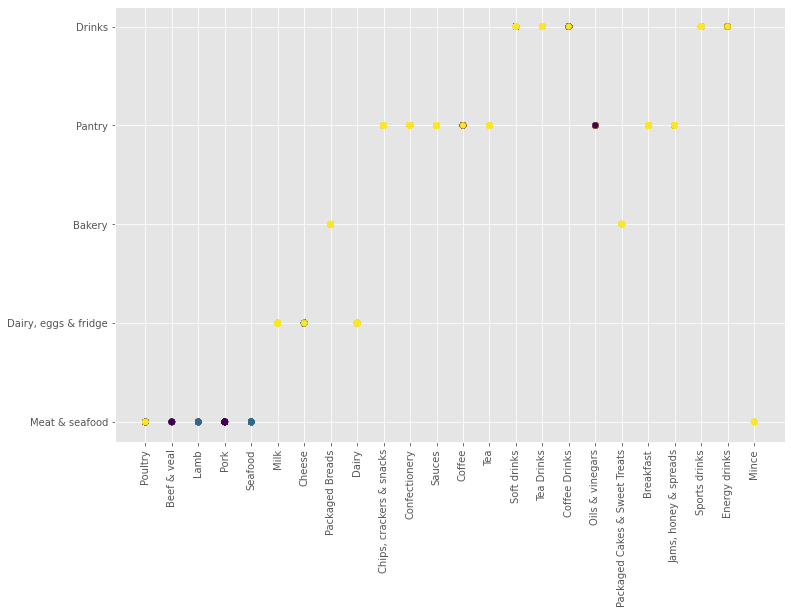

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "Sub_category"], data.loc[:,"Category"], c=clusters)
plt.xticks(rotation=90)
plt.show()

In [12]:
data.columns

Index(['Category', 'Sub_category', 'Product_Group', 'Product_Name',
       'Package_price', 'Price_per_unit', 'package_size', 'is_estimated',
       'is_special', 'in_stock', 'Retail_price', 'Brand', 'Sku', 'unit_price',
       'unit_price_unit', 'city', 'cluster'],
      dtype='object')

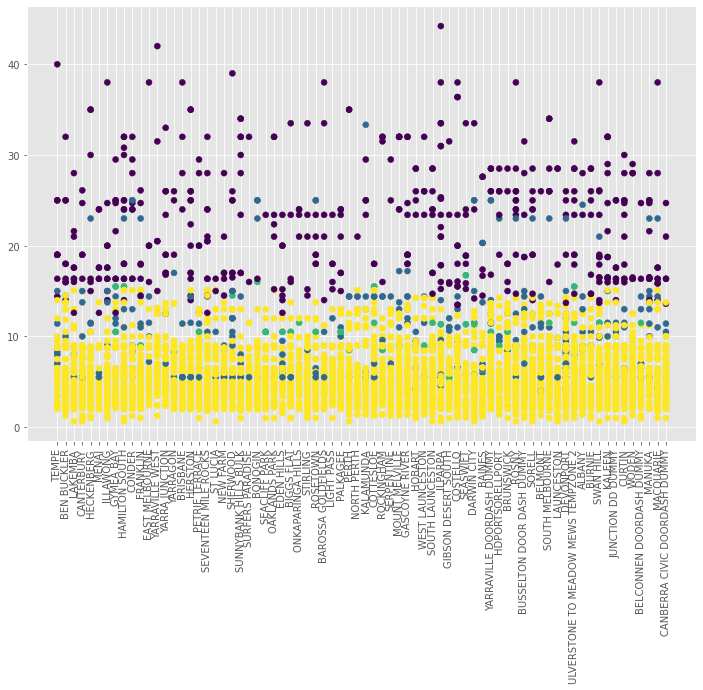

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "city"], data.loc[:,"Retail_price"], c=clusters)
plt.xticks(rotation=90)
plt.show()

****

In [14]:
!pip install prince

In [15]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df)
tips_mca = mca.transform(df)
tips_mca.head()

,0,1
0,0.504410,-0.090031
1,0.347847,-0.046580
2,0.346073,-0.045663
3,0.831763,-0.014896
4,0.416507,-0.043450


In [16]:
mca.explained_inertia_

[0.0015952984497622758, 0.0013930352833159375]

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (0.16% inertia)', ylabel='Component 1 (0.14% inertia)'>

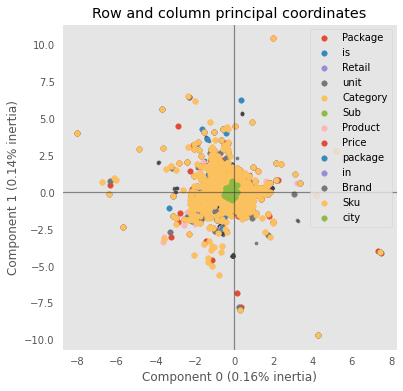

In [17]:
mca.plot_coordinates(X = df)

****

In [18]:
from prince import FAMD
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)
famd.fit(df)
famd.transform(df)

,0,1
0,1.015251,-0.830000
1,4.716840,-1.828546
2,4.723664,-1.867040
3,3.978404,-3.133749
4,3.862775,-1.839487
...,...,...
6325,2.208371,2.670631
6326,0.831728,1.430718
6327,-0.546261,-0.068001
6328,-0.550091,-0.062268


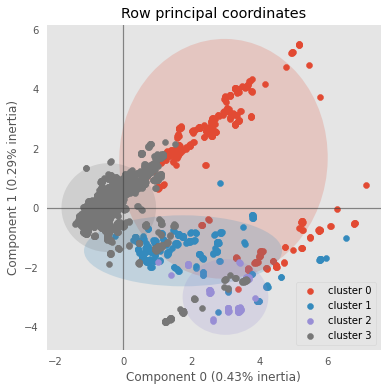

In [19]:
ax = famd.plot_row_coordinates(df,color_labels=['cluster {}'.format(t) for t in data['cluster']] )

In [20]:
famd.partial_row_coordinates(df)

Categorical              Numerical          
                0            1         0         1
0     7966.573243 -8865.695086  0.210625  0.212110
1     7797.951141 -7853.628801  5.159108 -0.518006
2     7758.557709 -7834.279533  5.159108 -0.518006
3     8348.956175 -8348.233608  4.062021 -2.385937
4     8001.583893 -7840.640258  3.911159 -1.141565
...           ...          ...       ...       ...
6325  1799.513488  5825.409863  2.820176  1.664986
6326  1754.145642  5944.882648  0.991646  0.704547
6327  1213.899779  4525.518116 -0.852984 -0.468059
6328  1215.121120  4526.102905 -0.852984 -0.468059
6329  1371.001674  4224.491783 -0.587756  0.308117

[6330 rows x 4 columns]

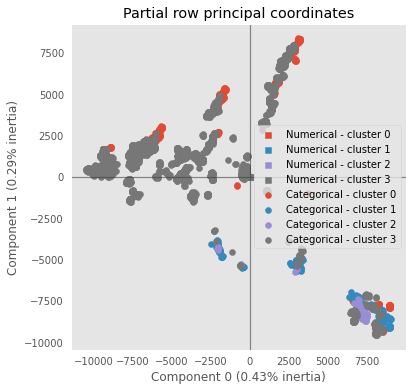

In [21]:
ax = famd.plot_partial_row_coordinates(df, color_labels=['cluster {}'.format(t) for t in data['cluster']])

****

![](https://miro.medium.com/max/828/1*WhKA9Jboj_1sHa0MbWQQ7w.webp)